<a href="https://colab.research.google.com/github/HectorTH1994/MLDatos/blob/main/codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install nltk
!python -m nltk.downloader stopwords
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/lib/python3.9/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Carga de datos

In [ ]:
###Cargamos datos
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [ ]:
df_test.shape

(1500, 2)

In [ ]:
print(df_train.shape)
#Calculamos na
print("Los NA son:")
print(df_train.isna().sum())

(9349, 3)
Los NA son:
id      0
name    0
text    0
dtype: int64


No hay NA, por lo tanto no se elimina ningun valor, ni se realiza imputacion

In [ ]:
#Contamos número de registros para cada una de las personas
print("Datos de entrenamiento")
df_train.groupby('name')['text'].count()


Datos de entrenamiento


name
Lopez    3470
Petro    2877
Uribe    3002
Name: text, dtype: int64

# Preprocesamiento de los datos

Se encuentra que es una muestra relativamente equilibra, por lo tanto no se realizara ningun tipo de trabajo adicional respecto al balanceo.

In [ ]:
#Creamo una columna para trabajar el procesamiento
df_train = df_train.assign(texto_procesado=df_train.text)
df_test = df_test.assign(texto_procesado=df_test.text)

## Se transforman todas las palabras a minusculas
df_train.texto_procesado = df_train.texto_procesado.str.lower()
df_test.texto_procesado = df_test.texto_procesado.str.lower()

# Quitamos tildes 
from unidecode import unidecode
df_train.texto_procesado = df_train.texto_procesado.apply(lambda x: unidecode(x))
df_test.texto_procesado = df_test.texto_procesado.apply(lambda x: unidecode(x))

#  quitamos signos, aunque TfidfVectorizer los quita por defecto
df_train.texto_procesado = df_train.texto_procesado.str.replace('-', ' ')
df_test.texto_procesado = df_test.texto_procesado.str.replace('-', ' ')
df_train.texto_procesado = df_train.texto_procesado.str.replace(r'[^\w\s]', '')
df_test.texto_procesado = df_test.texto_procesado.str.replace(r'[^\w\s]', '')

#  quitamos los saltos que estan en forma de \n
df_train.texto_procesado = df_train.texto_procesado.str.replace('\n', '')
df_test.texto_procesado = df_test.texto_procesado.str.replace('\n', '')


<ipython-input-114-0f91f96ae227>:17: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train.texto_procesado = df_train.texto_procesado.str.replace(r'[^\w\s]', '')
<ipython-input-114-0f91f96ae227>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test.texto_procesado = df_test.texto_procesado.str.replace(r'[^\w\s]', '')


In [ ]:
print("Texto sin procesar")
print(df_train.text[1])
print("Texto procesado")
print(df_train.texto_procesado[1])

Texto sin procesar
¡Si Bogotá y Cundinamarca salen adelante Colombia sale adelante! Trabajando juntos y reconociéndonos como iguales cundinamarqueses y bogotanos vamos lograr que nuestros campesinos tengan una vida digna. De eso se trata construir paz y así lo haremos en Bogotá-Región. 
Texto procesado
si bogota y cundinamarca salen adelante colombia sale adelante trabajando juntos y reconociendonos como iguales cundinamarqueses y bogotanos vamos lograr que nuestros campesinos tengan una vida digna de eso se trata construir paz y asi lo haremos en bogota region 


In [ ]:
#eliminamos las stopword del los textos

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#Palabras en espanol
stop_words = set(stopwords.words('spanish'))
stop_words.update(["comida", "restaurante", "lugar", "día","usted","ustedes","usd"])

#Creamos una funcion que nos permite eliminar las stopword de cada columna
def eliminar_stopwords(texto):
    palabras = word_tokenize(texto)
    palabras_sin_stopwords = [palabra for palabra in palabras if palabra not in stop_words]
    texto_sin_stopwords = ' '.join(palabras_sin_stopwords)
    return texto_sin_stopwords

#Aplicamos la funcion a cada fila
df_train.texto_procesado_sin = df_train.texto_procesado.apply(lambda x: eliminar_stopwords(x))
df_test.texto_procesado_sin = df_test.texto_procesado.apply(lambda x: eliminar_stopwords(x))


#Revisamos los resultados
print("Texto sin procesar")
print(df_train.text[1])
print("Texto procesado")
print(df_train.texto_procesado_sin[1])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-116-f684c5a1c409>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_train.texto_procesado_sin = df_train.texto_procesado.apply(lambda x: eliminar_stopwords(x))


Texto sin procesar
¡Si Bogotá y Cundinamarca salen adelante Colombia sale adelante! Trabajando juntos y reconociéndonos como iguales cundinamarqueses y bogotanos vamos lograr que nuestros campesinos tengan una vida digna. De eso se trata construir paz y así lo haremos en Bogotá-Región. 
Texto procesado
si bogota cundinamarca salen adelante colombia sale adelante trabajando juntos reconociendonos iguales cundinamarqueses bogotanos vamos lograr campesinos vida digna trata construir paz asi haremos bogota region


<ipython-input-116-f684c5a1c409>:21: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_test.texto_procesado_sin = df_test.texto_procesado.apply(lambda x: eliminar_stopwords(x))


In [ ]:
len(stop_words)

320

In [ ]:
from nltk.stem import WordNetLemmatizer


# Descarga los recursos necesarios para el lematizador de nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

# Inicializa el lematizador
lemmatizer = WordNetLemmatizer()

# Definir una función personalizada para la lematización
def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df_train["texto_antes_lemmatize"]=df_train.texto_procesado_sin
df_train.texto_procesado_sin = df_train.texto_procesado_sin.apply(lemmatize_text)
print("Texto sin procesar")
print(df_train.text[2])
print("Texto procesado")
print(df_train.texto_procesado_sin[2])

Texto sin procesar
Esto significa el proyecto de acuerdo de rescate social y económico que estamos tramitando ante el Concejo de Bogotá: 
Texto procesado
significa proyecto acuerdo rescate social economico tramitando concejo bogota


In [ ]:
df_train["texto_final"]=df_train.texto_procesado_sin
df_train.columns


Index(['id', 'name', 'text', 'texto_procesado', 'texto_antes_lemmatize',
       'texto_final'],
      dtype='object')

# Análisis descriptivo

Palabras mas frecuentes

In [ ]:
##Cargamos paquetes que utilizamos
nltk.download('punkt')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob

!pip install textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
#separamos los datos para cada persona
from collections import Counter

# DataFrame para cada persona
Lopez_df = df_train[df_train['name'] == 'Lopez']
Petro_df = df_train[df_train['name'] == 'Petro']
Uribe_df = df_train[df_train['name'] == 'Uribe']

# Conteo de palabras más frecuentes por persona
Lopez_words = Counter(Lopez_df["texto_final"].str.cat(sep=' ').split()).most_common(100)
Petro_words = Counter(Petro_df["texto_final"].str.cat(sep=' ').split()).most_common(100)
Uribe_words = Counter(Uribe_df["texto_final"].str.cat(sep=' ').split()).most_common(100)

print('Palabras más frecuentes de Lopez:', Lopez_words)
print('Palabras más frecuentes de Petro:', Petro_words)
print('Palabras más frecuentes de Uribe:', Uribe_words)

###Almacenamos las variables
Lopez_words_list = [word[0] for word in Lopez_words]
Petro_words_list = [word[0] for word in Petro_words]
Uribe_words_list = [word[0] for word in Uribe_words]
Lopez_text = ' '.join(Lopez_words_list)
Petro_text = ' '.join(Petro_words_list)
Uribe_text = ' '.join(Uribe_words_list)
##Se crea las matrices
wordcloud_Lopez = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(Lopez_text)
wordcloud_Petro = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(Petro_text)
wordcloud_Uribe = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(Uribe_text)


Palabras más frecuentes de Lopez: [('bogota', 1273), ('ma', 666), ('hoy', 602), ('ciudad', 487), ('gracias', 341), ('ano', 332), ('dia', 292), ('toda', 285), ('vacunacion', 268), ('jovenes', 261), ('cuidado', 257), ('seguridad', 223), ('vida', 218), ('mujeres', 215), ('social', 201), ('persona', 192), ('publico', 191), ('salud', 185), ('nacional', 169), ('trabajo', 168), ('educacion', 162), ('vamos', 161), ('tambien', 158), ('primera', 147), ('si', 145), ('covid', 145), ('junto', 144), ('ciudadanos', 144), ('plan', 140), ('gobierno', 140), ('mil', 138), ('reactivacion', 135), ('gran', 133), ('medidas', 132), ('pandemia', 131), ('semana', 130), ('19', 129), ('linea', 129), ('puntos', 126), ('mejor', 121), ('ninos', 120), ('sector', 120), ('policiabogota', 119), ('hacer', 119), ('ciudadania', 117), ('estan', 114), ('casa', 113), ('solo', 113), ('atencion', 113), ('3', 111), ('sistema', 110), ('ser', 110), ('empleo', 110), ('metro', 110), ('colombia', 109), ('localidad', 107), ('movilidad

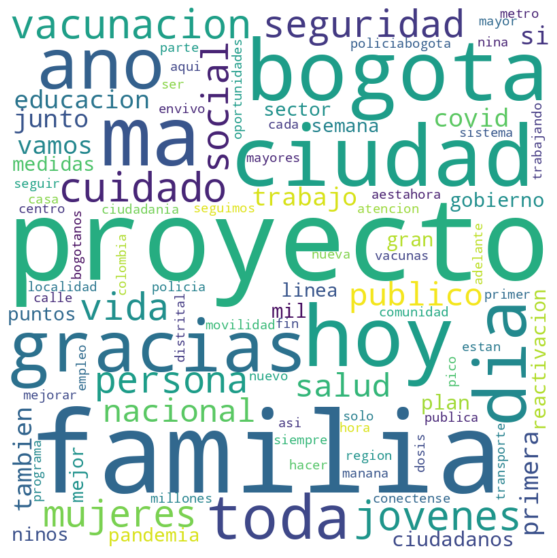

In [ ]:
# Nube Lopez 

plt.figure(figsize=(10,10))
plt.imshow(wordcloud_Lopez, interpolation='bilinear')
plt.axis("off")
plt.show()

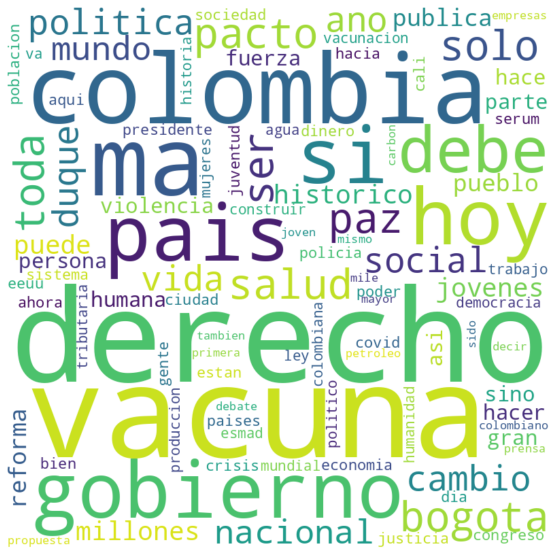

In [ ]:
#nube Petro

plt.figure(figsize=(10,10))
plt.imshow(wordcloud_Petro, interpolation='bilinear')
plt.axis("off")
plt.show()

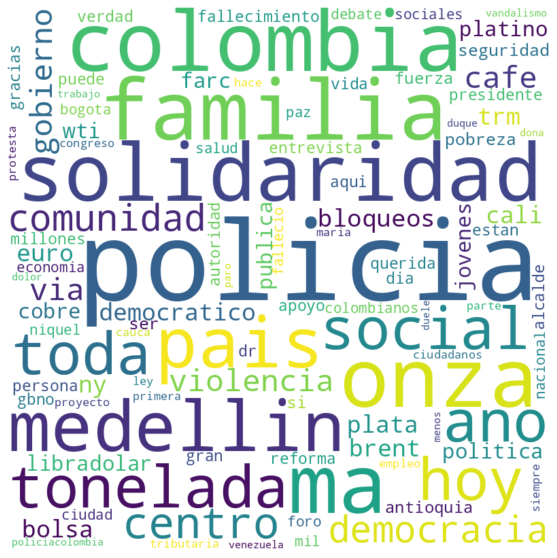

In [ ]:
#nube Uribe
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_Uribe, interpolation='bilinear')
plt.axis("off")
plt.show()

# Procesamiento de datos

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
# Ajustar el vectorizador a los datos de entrenamiento
X_train_tfidf = vectorizer.fit_transform(df_train.texto_procesado_sin)
X_test_tfidf = vectorizer.transform(df_test.texto_procesado_sin)
y_train = df_train.name

In [ ]:
X_train_tfidf

<9349x28868 sparse matrix of type '<class 'numpy.float64'>'
	with 155797 stored elements in Compressed Sparse Row format>

<9349x25131 sparse matrix of type '<class 'numpy.float64'>'
	with 158764 stored elements in Compressed Sparse Row format>

# Naive Bayes classifier 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Entrenar un modelo de clasificación con los datos de entrenamiento transformados
from sklearn.naive_bayes import MultinomialNB

# Crear un modelo MultinomialNB
nb_model = MultinomialNB()
# Definir los parámetros a ajustar
param_grid = {'alpha': [0.01, 0.075,0.08,0.085, 0.1, 0.11, 0.2, 0.3]}

# Realizar la búsqueda de parámetros con GridSearchCV para el modelo de MultinomialNB
nb_grid = GridSearchCV(nb_model, param_grid, cv=5, n_jobs=-1)
nb_grid.fit(X_train_tfidf, y_train)

# Obtener el mejor score y los mejores parámetros
nb_best_score = nb_grid.best_score_
nb_best_params = nb_grid.best_params_

# Obtener el mejor modelo
best_model = nb_grid.best_estimator_

# Predecir las etiquetas de los datos de prueba transformados
y_pred_nb = best_model.predict(X_test_tfidf)


print("MultinomialNB Best Params: ", nb_best_params)
print("MultinomialNB Best Score: ", nb_best_score)
# Almacenamos la respuesta
df_predicciones = pd.DataFrame({'id': df_test.id, 'name': y_pred_nb})
df_predicciones.to_csv('predicciones_naive_bayes.csv', index=False)

MultinomialNB Best Params:  {'alpha': 0.08}
MultinomialNB Best Score:  0.8501433177969859


#USAMOS RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Creación del clasificador RandomForest
rf = RandomForestClassifier()

# Definición de los parámetros para grid search
parameters = {
    'n_estimators': [10, 100, 1000],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2,3, 4, 5, 10],
    'min_samples_leaf': [1, 4, 5]
    }

# Búsqueda de los mejores parámetros con validación cruzada
clf = GridSearchCV(rf, parameters, cv=10, n_jobs=-1)
clf.fit(X_train_tfidf, y_train)

# Entrenamiento con los mejores parámetros
rf_best = RandomForestClassifier(**clf.best_params_)
rf_best.fit(X_train_tfidf, y_train)

# Predicción en los datos de test
y_pred_rf = rf_best.predict(X_test_tfidf)

# Creación del dataframe de predicciones
df_pred = pd.DataFrame({'id': df_test.id, 'name': y_pred_rf})

# Guardado del dataframe de predicciones en formato csv
df_pred.to_csv('predicciones.csv', index=False)

##mejor score
print("Mejor puntaje Random Forest: ", clf.best_score_)

KeyboardInterrupt: ignored

Con regresion logistica

el modelo se demora en correr 3 horas o mas, corralo bajo su propio riesgo o baje los hiperparamtros

In [ ]:
from sklearn.linear_model import LogisticRegression


# Definir el modelo de Regresión Logística
lr = LogisticRegression(max_iter=10000)

#Los hiperparametros sera alpha 
param_grid = {
    'penalty': ['elasticnet'],
    'solver': ['saga'],
    'l1_ratio': np.logspace(-4, 0, 5),
    'C': [5,6,7,8,9]
}


# Crear un objeto GridSearchCV para tunear el modelo
grid_lr = GridSearchCV(lr, param_grid, cv=10, n_jobs=-1)

# Entrenar el modelo con los datos de entrenamiento
grid_lr.fit(X_train_tfidf, y_train)

# Obtener el mejor modelo y sus parámetros
lr_best = grid_lr.best_estimator_

# Imprimir los mejores parámetros y su puntaje de validación cruzada
print("Mejores parámetros: ", grid_lr.best_params_)
print("Puntaje de validación cruzada: ", grid_lr.best_score_)

# Hacer predicciones en los datos de prueba
y_pred_regresion_logistica = lr_best.predict(X_test_tfidf)

# Creación del dataframe de predicciones
df_pred = pd.DataFrame({'id': df_test.id, 'name': y_pred_regresion_logistica})

# Guardado del dataframe de predicciones en formato csv
df_pred.to_csv('predicciones_regresion_logistica.csv', index=False)

Esto da corriendo 6 horas
Mejores parámetros:  {'C': 7.742636826811277, 'l1_ratio': 0.0001, 'penalty': 'elasticnet', 'solver': 'saga'}
Puntaje de validación cruzada:  0.8608394691339647

#Usando redes de neuronas con keras

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score

# Definir el modelo de la red neuronal
def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train_tfidf.shape[1]))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Crear el modelo
model = create_model()

# Evaluar el modelo con validación cruzada
scores = cross_val_score(model, X_train_tfidf, y_train, cv=10, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_tfidf, y_train, epochs=10, batch_size=32)

# Hacer una predicción con nuevos datos
y_pred = model.predict(X_test_tfidf)

# Redondear los valores de la predicción a 0 o 1
y_pred = np.round(y_pred)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Definir el modelo de la red neuronal
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_tfidf.shape[1]))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_tfidf, y_train, epochs=10, batch_size=32)

# Evaluar el modelo en los datos de prueba
loss, accuracy = model.evaluate(X_test_tfidf, y_test)
print('Test accuracy:', accuracy)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Cargar los datos en un DataFrame de Pandas
datos = df_train

# Filtrar los datos según la condición deseada
datos_filtrados = datos[datos["name"] == "Petro"]

# Unir todas las frases en una sola cadena de texto
text = " ".join(datos_filtrados["texto_procesado_sin"])

# Crear el objeto WordCloud con las opciones deseadas
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate(text)

# Graficar el objeto WordCloud con matplotlib
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

***Super Learner***

